In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import zipfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

from skimage import color, io
from scipy.misc import imresize

np.random.seed(133)

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

IMAGE_SIZE = 227 #224

In [2]:
from six.moves import cPickle as pickle
pickle_file = 'catfish.pickle'
try:
    with open(pickle_file) as f:
        save=pickle.load(f)
except Exception as e:
  print('Unable to load data from', pickle_file, ':', e)
  raise
    
train_images_sane=save['train_images_sane']
train_images=save['train_images']
insane_indices=save['insane_indices']
test_images=save['test_images']


In [3]:
def read_image(filepath):
    img = io.imread(filepath)
    new_img = np.array(imresize(img, (IMAGE_SIZE, IMAGE_SIZE), interp='bicubic'))
    return new_img

X_train = np.array([read_image(train_images_sane[i]) for i in xrange(len(train_images_sane))])
Y_train = np.array([int('dog' in train_images_sane[i]) for i in xrange(len(train_images_sane))])

X_train = X_train.astype('float32')
#X_train /= 255

X_verify = np.array([read_image(train_images[i]) for i in insane_indices])
Y_verify = np.array([int('dog' in train_images[i]) for i in insane_indices])

X_verify = X_verify.astype('float32')
#X_verify /= 255

MemoryError: 

In [5]:
import gc
gc.collect()

X_test = np.array([read_image(test_images[i]) for i in xrange(len(test_images))])
X_test = X_test.astype('float32')


In [7]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels


#X_train, Y_train = randomize(X_train, Y_train)
#X_verify, Y_verify = randomize(X_verify, Y_verify)


0

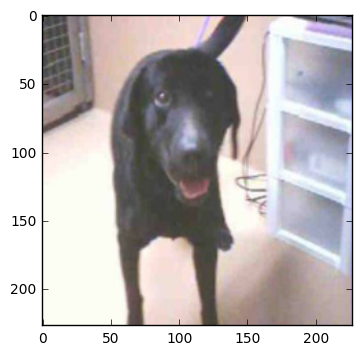

1


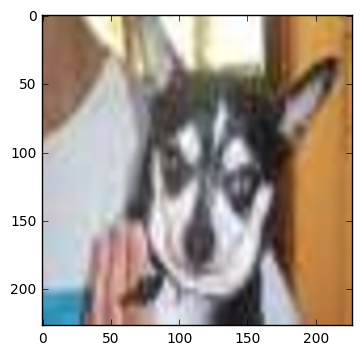

1


In [6]:
random_image=np.random.choice(len(train_images_sane))
plt.imshow(X_train[random_image]/255)
plt.show()
print(Y_train[random_image])

random_image=np.random.choice(len(insane_indices))
plt.imshow(X_verify[random_image]/255)
plt.show()
print(Y_verify[random_image])

In [8]:
import sys
sys.path.append("keras-squeezenet")

from squeezenet import get_squeezenet

squeezenet_model = get_squeezenet(1000, dim_ordering='tf')
squeezenet_model.compile(loss="categorical_crossentropy", optimizer="adam")
squeezenet_model.load_weights('keras-squeezenet/model/squeezenet_weights_tf_dim_ordering_tf_kernels.h5', by_name=True)

Using TensorFlow backend.


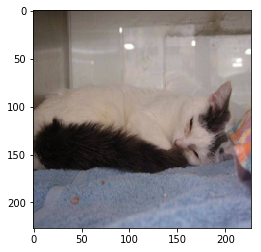

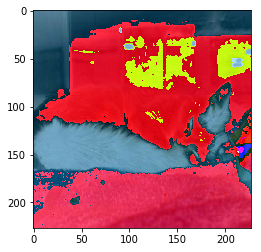

Predicted: [(u'n02445715', u'skunk', 0.73715937), (u'n02123394', u'Persian_cat', 0.1308443), (u'n02441942', u'weasel', 0.028827338)]


In [10]:
from scipy import misc
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

import copy

random_image= 404 #np.random.choice(len(train_images_sane))

def get_squeezenet_pred(idx):
    x = copy.copy(X_train[idx])
    plt.imshow(x)
    plt.show()
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    res = squeezenet_model.predict(x)
    print('Predicted:', decode_predictions(res, top=3)[0])
    


x = copy.copy(X_train[random_image])
plt.imshow(x/255)
plt.show()
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


plt.imshow(x[0])
plt.show()


res = squeezenet_model.predict(x)
print('Predicted:', decode_predictions(res, top=3)[0])


In [19]:
# just get te dogs and cat labels
X_train=preprocess_input(X_train)
train_preds=squeezenet_model.predict(X_train, verbose=1)
train_preds_decoded=decode_predictions(train_preds, top=3)

23814/23814 [==============================] - 138s   


In [81]:
pickle_file = 'squeezenet_train_preds.pickle'

try:
  f = open(pickle_file, 'wb')
  pickle.dump(train_preds, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 95256136


In [11]:
preprocess_input(X_test)
train_preds=squeezenet_model.predict(X_test, verbose=1)

pickle_file = 'squeezenet_test_preds.pickle'

try:
  f = open(pickle_file, 'wb')
  pickle.dump(train_preds, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

12500/12500 [==============================] - 18s     

In [12]:
preprocess_input(X_verify)
train_preds=squeezenet_model.predict(X_verify, verbose=1)

pickle_file = 'squeezenet_verify_preds.pickle'

try:
  f = open(pickle_file, 'wb')
  pickle.dump(train_preds, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

1184/1186 [============================>.] - ETA: 0s

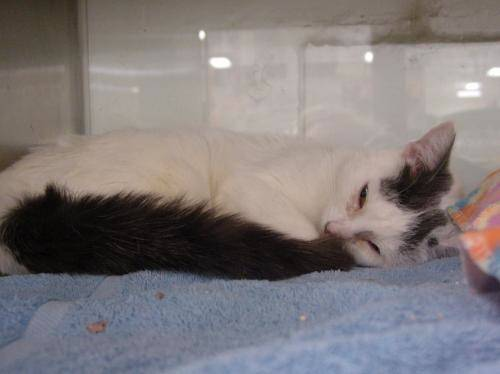

Dog: 0
[(u'n02123394', u'Persian_cat', 0.25117636), (u'n02445715', u'skunk', 0.2311056), (u'n02086910', u'papillon', 0.052570205)]


In [75]:
def display_train_image_by_idx(idx):
    display(Image(train_images_sane[idx]))

def display_image_pred(idx, img_set=X_train,img_labels=Y_train, preds=train_preds_decoded):
    #plt.imshow(img_set[idx])
    #plt.show()
    display_train_image_by_idx(idx)
    print("Dog:", img_labels[idx])
    print(preds[idx])

display_image_pred(404)

In [78]:
#from sets import Set
cat_labels=[train_preds_decoded[i][0][1] for i in xrange(len(Y_train)) 
                if train_preds_decoded[i][0][2]>0.95 and Y_train[i]==0 ]

dog_labels=[train_preds_decoded[i][0][1] for i in xrange(len(Y_train)) 
                if train_preds_decoded[i][0][2]>0.95 and Y_train[i]==1 ]

common_lamels=np.intersect1d(cat_labels, dog_labels)
# array([], dtype=object) # the sets are mutualy excluding

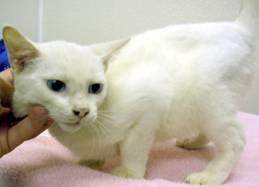

Dog: 0
[(u'n02085620', u'Chihuahua', 0.97475928), (u'n02087046', u'toy_terrier', 0.0068499143), (u'n02123597', u'Siamese_cat', 0.0046765581)]
[]
Cats: [u'Angora' u'Egyptian_cat' u'Mexican_hairless' u'Persian_cat'
 u'Siamese_cat' u'armadillo' u'feather_boa' u'hamster' u'kit_fox' u'koala'
 u'lynx' u'mink' u'plastic_bag' u'tabby' u'triceratops']
Dogs: [u'American_Staffordshire_terrier' u'Arabian_camel' u'Bedlington_terrier'
 u'Blenheim_spaniel' u'Border_collie' u'Boston_bull'
 u'Bouvier_des_Flandres' u'Brittany_spaniel' u'Chesapeake_Bay_retriever'
 u'Doberman' u'English_setter' u'English_springer' u'German_shepherd'
 u'German_short-haired_pointer' u'Great_Pyrenees' u'Ibizan_hound'
 u'Irish_setter' u'Italian_greyhound' u'Labrador_retriever' u'Lhasa'
 u'Norwegian_elkhound' u'Pekinese' u'Saint_Bernard' u'Samoyed'
 u'Scotch_terrier' u'Scottish_deerhound' u'Shih-Tzu'
 u'Staffordshire_bullterrier' u'Sussex_spaniel' u'Walker_hound'
 u'Weimaraner' u'West_Highland_white_terrier' u'affenpinscher' u

In [83]:
display_image_pred(14571)

cat_labels=[l for l in cat_labels if l not in common_lamels]
common_lamels=np.intersect1d(cat_labels, dog_labels)
print(common_lamels)
dog_labels=[l for l in dog_labels if l not in common_lamels]

print("Cats:",np.unique(cat_labels))
print("Dogs:",np.unique(dog_labels))
#dog_labels

SyntaxError: invalid syntax (<ipython-input-71-ca09c28a3e03>, line 1)